# The thinking behind this code
This is just a free-flowing exploration of the JEDI catalog. I can look at merging multiple .csv's, getting statistics, creating plots, etc.

In [35]:
# Standard modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import dates
import seaborn as sns
from scipy.io.idl import readsav
from skimage.measure import block_reduce
import altair as alt

# Custom modules
from jpm_time_conversions import *
from jpm_logger import JpmLogger
%matplotlib inline
sns.set()
#plt.style.use('jpm-dark')

In [3]:
# Read in the JEDI catalog
jedi = pd.read_csv('/Users/jmason86/Dropbox/Research/Postdoc_NASA/Analysis/Coronal Dimming Analysis/JEDI Catalog/jedi_v1.csv')

/Users/jmason86/anaconda/envs/altair/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (6,46,47,48,49,50,51,52,53,54,55,56,57,58,60,62,63,64,65,66,67,68,69,70,71,72,73,74,77,78,79,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,99,101,102,103,104,105,106,107,108,109,110,111,112,113,116,117,118,120,121,122,123,280,281,282,283,284,285,286,287,288,289,290,291,292,294,296,297,298,299,300,301,302,303,304,305,306,307,308,311,312,313,315,316,317,318,397,398,399,400,401,402,403,404,405,406,407,408,409,411,413,414,415,416,417,418,419,420,421,422,423,424,425,428,429,430,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,450,452,453,454,455,456,457,458,459,460,461,462,463,464,467,468,469,471,472,473,474,592,593,594,595,596,597,598,599,600,601,602,603,605,608,609,610,612,614,618,619,624,627,628,630,632,633,634,635,636,637,638,639,640,641,643,646,647,648,649,650,651,652,654,656,657,662,665,667,668,671,672,673,675,677,679,681,706,707,709,710

In [6]:
jedi

,Event #,GOES Flare Start Time,GOES Flare Peak Time,GOES Flare Class,Pre-Flare Start Time,Pre-Flare End Time,Flare Interrupt,9.4 Pre-Flare Irradiance [W/m2],13.1 Pre-Flare Irradiance [W/m2],13.3 Pre-Flare Irradiance [W/m2],...,103.2 by 63.0 Fitting Score,103.2 by 71.9 Fitting Score,103.2 by 72.2 Fitting Score,103.2 by 77.0 Fitting Score,103.2 by 79.0 Fitting Score,103.2 by 83.6 Fitting Score,103.2 by 95.0 Fitting Score,103.2 by 97.3 Fitting Score,103.2 by 97.7 Fitting Score,103.2 by 102.6 Fitting Score
0,1.0,2010-05-04 16:15:00.000,2010-05-04 16:29:00.000,C3.6,2010-05-04 08:29:00.000,2010-05-04 16:29:00.000,True,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2.0,2010-05-05 07:09:00.000,2010-05-05 07:16:00.000,C2.3,2010-05-04 23:16:00.000,2010-05-05 07:16:00.000,True,0.000004,0.000002,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3.0,2010-05-05 11:37:00.000,2010-05-05 11:52:00.000,C8.8,2010-05-04 23:16:00.000,2010-05-05 07:16:00.000,True,0.000004,0.000002,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4.0,2010-05-05 17:13:00.000,2010-05-05 17:19:00.000,M1.2,2010-05-04 23:16:00.000,2010-05-05 07:16:00.000,False,0.000004,0.000002,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5.0,2010-05-07 07:29:00.000,2010-05-07 07:42:00.000,C2.0,2010-05-06 23:42:00.000,2010-05-07 07:42:00.000,True,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,6.0,2010-05-08 04:51:00.000,2010-05-08 04:59:00.000,C9.3,2010-05-07 20:59:00.000,2010-05-08 04:59:00.000,True,NaN,0.000002,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.329834,0.073395
6,7.0,2010-05-08 11:40:00.000,2010-05-08 11:50:00.000,C1.8,2010-05-07 20:59:00.000,2010-05-08 04:59:00.000,True,NaN,0.000002,NaN,...,0.373334,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.126622,NaN
7,9.0,2010-06-12 00:30:00.000,2010-06-12 00:57:00.000,M2.0,2010-06-11 16:57:00.000,2010-06-12 00:57:00.000,True,NaN,0.000002,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,10.0,2010-06-12 03:57:00.000,2010-06-12 04:06:00.000,C1.0,2010-06-11 16:57:00.000,2010-06-12 00:57:00.000,True,NaN,0.000002,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,11.0,2010-06-12 09:02:00.000,2010-06-12 09:17:00.000,C6.1,2010-06-11 16:57:00.000,2010-06-12 00:57:00.000,True,NaN,0.000002,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
jedi.describe()

,Event #,9.4 Pre-Flare Irradiance [W/m2],13.1 Pre-Flare Irradiance [W/m2],13.3 Pre-Flare Irradiance [W/m2],17.1 Pre-Flare Irradiance [W/m2],17.7 Pre-Flare Irradiance [W/m2],18.0 Pre-Flare Irradiance [W/m2],19.5 Pre-Flare Irradiance [W/m2],20.2 Pre-Flare Irradiance [W/m2],21.1 Pre-Flare Irradiance [W/m2],...,103.2 by 63.0 Fitting Score,103.2 by 71.9 Fitting Score,103.2 by 72.2 Fitting Score,103.2 by 77.0 Fitting Score,103.2 by 79.0 Fitting Score,103.2 by 83.6 Fitting Score,103.2 by 95.0 Fitting Score,103.2 by 97.3 Fitting Score,103.2 by 97.7 Fitting Score,103.2 by 102.6 Fitting Score
count,4770.000000,1720.000000,2.447000e+03,3.500000e+01,1043.000000,962.000000,1033.000000,1150.000000,1094.000000,1154.000000,...,211.000000,0.0,0.0,28.000000,68.000000,234.000000,0.0,13.000000,281.000000,234.000000
mean,2591.981761,0.000007,3.089379e-06,1.231644e-06,0.000062,0.000045,0.000068,0.000055,0.000050,0.000036,...,-0.168505,NaN,NaN,-0.275949,-0.436921,-0.277788,NaN,-0.234422,-0.375906,-0.262103
std,1427.123541,0.000001,3.526283e-07,5.632303e-08,0.000005,0.000004,0.000007,0.000007,0.000008,0.000007,...,0.925214,NaN,NaN,0.509231,0.910583,0.563634,NaN,0.359992,1.221007,0.535941
min,1.000000,0.000004,2.165025e-06,1.084732e-06,0.000050,0.000033,0.000045,0.000030,0.000024,0.000012,...,-10.069916,NaN,NaN,-1.313930,-5.666442,-4.520655,NaN,-0.663326,-14.528566,-4.296279
25%,1387.250000,0.000007,2.862372e-06,1.257444e-06,0.000058,0.000042,0.000063,0.000051,0.000046,0.000032,...,-0.446694,NaN,NaN,-0.543729,-0.577064,-0.520851,NaN,-0.584188,-0.611858,-0.532444
50%,2626.500000,0.000007,3.114408e-06,1.257444e-06,0.000062,0.000046,0.000067,0.000057,0.000053,0.000037,...,-0.082531,NaN,NaN,-0.317944,-0.319469,-0.186389,NaN,-0.277578,-0.189077,-0.212825
75%,3820.750000,0.000008,3.321916e-06,1.257444e-06,0.000065,0.000048,0.000074,0.000061,0.000055,0.000040,...,0.311428,NaN,NaN,0.028846,-0.035912,0.012193,NaN,-0.078080,0.115295,0.050080
max,5059.000000,0.000009,3.954051e-06,1.270700e-06,0.000078,0.000056,0.000084,0.000075,0.000069,0.000052,...,0.939408,NaN,NaN,0.702500,0.509037,0.908943,NaN,0.470036,0.781192,0.887325


In [7]:
jedi.filter(regex='17.1 by \d+.\d Depth \[%\]')

,17.1 by 9.4 Depth [%],17.1 by 13.1 Depth [%],17.1 by 13.3 Depth [%],17.1 by 17.7 Depth [%],17.1 by 18.0 Depth [%],17.1 by 19.5 Depth [%],17.1 by 20.2 Depth [%],17.1 by 21.1 Depth [%],17.1 by 25.6 Depth [%],17.1 by 28.4 Depth [%],...,17.1 by 71.9 Depth [%],17.1 by 72.2 Depth [%],17.1 by 77.0 Depth [%],17.1 by 79.0 Depth [%],17.1 by 83.6 Depth [%],17.1 by 95.0 Depth [%],17.1 by 97.3 Depth [%],17.1 by 97.7 Depth [%],17.1 by 102.6 Depth [%],17.1 by 103.2 Depth [%]
0,NaN,NaN,NaN,NaN,1.911252,2.979683,1.939661,3.677964,1.601725,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,2.167913,3.640514,0.284804,1.391383,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,0.690887,NaN,0.964534,0.904077,NaN,1.566533,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,1.437311,0.483881,NaN,2.079374,1.969062,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.492279,NaN,NaN
4,NaN,NaN,NaN,NaN,43.057250,NaN,0.031195,2.695667,4.397899,3.562261,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.391549,NaN,NaN
5,NaN,NaN,NaN,0.501562,NaN,NaN,NaN,NaN,1.062153,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,0.328045,NaN,NaN,36.431353,NaN,NaN,1.655889,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.357279,0.124495,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,0.833777,0.910844,0.640290,NaN,1.095280,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,6.596484,1.336535,3.850008,2.588431,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
jedi.filter(regex='17.1 by \d+.\d Depth \[%\]').describe()

,17.1 by 9.4 Depth [%],17.1 by 13.1 Depth [%],17.1 by 13.3 Depth [%],17.1 by 17.7 Depth [%],17.1 by 18.0 Depth [%],17.1 by 19.5 Depth [%],17.1 by 20.2 Depth [%],17.1 by 21.1 Depth [%],17.1 by 25.6 Depth [%],17.1 by 28.4 Depth [%],...,17.1 by 71.9 Depth [%],17.1 by 72.2 Depth [%],17.1 by 77.0 Depth [%],17.1 by 79.0 Depth [%],17.1 by 83.6 Depth [%],17.1 by 95.0 Depth [%],17.1 by 97.3 Depth [%],17.1 by 97.7 Depth [%],17.1 by 102.6 Depth [%],17.1 by 103.2 Depth [%]
count,0.0,0.0,0.0,4.000000,5.000000,6.000000,7.000000,4.000000,7.000000,2.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.000000,1.000000,0.0
mean,NaN,NaN,NaN,2.029244,9.715225,1.892810,6.596503,2.184452,1.869148,2.609075,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.080369,0.124495,NaN
std,NaN,NaN,NaN,3.048430,18.642686,1.334064,13.213569,1.427308,1.158017,1.348009,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.868360,NaN,NaN
min,NaN,NaN,NaN,0.328045,0.833777,0.483881,0.031195,0.284804,1.062153,1.655889,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.357279,0.124495,NaN
25%,NaN,NaN,NaN,0.458183,1.336535,0.924266,0.772184,1.630732,1.243331,2.132482,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.424779,0.124495,NaN
50%,NaN,NaN,NaN,0.596224,1.437311,1.566223,1.939661,2.387521,1.566533,2.609075,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.492279,0.124495,NaN
75%,NaN,NaN,NaN,2.167286,1.911252,2.776740,3.114473,2.941241,1.785394,3.085668,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.941914,0.124495,NaN
max,NaN,NaN,NaN,6.596484,43.057250,3.850008,36.431353,3.677964,4.397899,3.562261,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.391549,0.124495,NaN


In [25]:
print(np.nanmean(jedi.filter(regex='17.1 by \d+.\d Depth \[%\]')))
np.mean(jedi.filter(regex='17.1 by \d+.\d Depth \[%\]'))

2.9376220256220815


17.1 by 9.4 Depth [%]      1.711764
17.1 by 13.1 Depth [%]     1.870080
17.1 by 13.3 Depth [%]          NaN
17.1 by 17.7 Depth [%]     5.452663
17.1 by 18.0 Depth [%]     3.395906
17.1 by 19.5 Depth [%]     6.501903
17.1 by 20.2 Depth [%]     4.088976
17.1 by 21.1 Depth [%]     2.741880
17.1 by 25.6 Depth [%]     1.939886
17.1 by 28.4 Depth [%]     1.938647
17.1 by 30.4 Depth [%]     2.069115
17.1 by 33.5 Depth [%]     1.844585
17.1 by 36.1 Depth [%]          NaN
17.1 by 36.8 Depth [%]     0.635556
17.1 by 44.6 Depth [%]          NaN
17.1 by 46.5 Depth [%]          NaN
17.1 by 49.9 Depth [%]     4.921554
17.1 by 52.1 Depth [%]     2.895438
17.1 by 52.6 Depth [%]     2.423641
17.1 by 53.7 Depth [%]     2.841375
17.1 by 55.4 Depth [%]          NaN
17.1 by 56.8 Depth [%]     1.812482
17.1 by 58.4 Depth [%]     3.442947
17.1 by 59.2 Depth [%]          NaN
17.1 by 60.0 Depth [%]          NaN
17.1 by 61.0 Depth [%]          NaN
17.1 by 62.5 Depth [%]     0.180306
17.1 by 63.0 Depth [%]     4

In [28]:
print(np.nanmean(jedi.filter(regex='19.5 by \d+.\d Depth \[%\]')))
np.mean(jedi.filter(regex='19.5 by \d+.\d Depth \[%\]'))

9.497484729170152


19.5 by 9.4 Depth [%]       1.724447
19.5 by 13.1 Depth [%]      1.989101
19.5 by 13.3 Depth [%]      1.729247
19.5 by 17.1 Depth [%]     26.114751
19.5 by 17.7 Depth [%]      2.374490
19.5 by 18.0 Depth [%]     14.371092
19.5 by 20.2 Depth [%]     38.542827
19.5 by 21.1 Depth [%]      1.580566
19.5 by 25.6 Depth [%]      0.957137
19.5 by 28.4 Depth [%]      1.959208
19.5 by 30.4 Depth [%]      1.422212
19.5 by 33.5 Depth [%]      2.066721
19.5 by 36.1 Depth [%]           NaN
19.5 by 36.8 Depth [%]      0.502411
19.5 by 44.6 Depth [%]           NaN
19.5 by 46.5 Depth [%]           NaN
19.5 by 49.9 Depth [%]           NaN
19.5 by 52.1 Depth [%]           NaN
19.5 by 52.6 Depth [%]           NaN
19.5 by 53.7 Depth [%]      0.601174
19.5 by 55.4 Depth [%]           NaN
19.5 by 56.8 Depth [%]           NaN
19.5 by 58.4 Depth [%]      0.841551
19.5 by 59.2 Depth [%]           NaN
19.5 by 60.0 Depth [%]      0.089832
19.5 by 61.0 Depth [%]      5.652086
19.5 by 62.5 Depth [%]      5.590833
1

Make it clear that there are some outliers in that 19.5 nm by * depth 

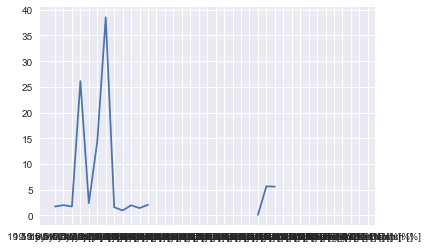

In [34]:
plt.plot(np.mean(jedi.filter(regex='19.5 by \d+.\d Depth \[%\]')));

In [ ]:
alt.Chart(jedi).mark_circle.encode(x=alt.X('date:O', timeUnit='date'),
    y=alt.Y('date:O', timeUnit='month'),
    color='weather')

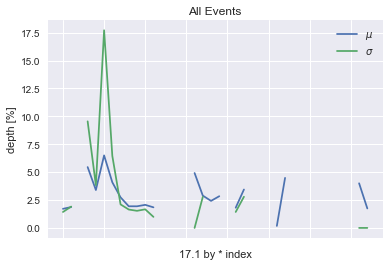

In [16]:
jedi.filter(regex='17.1 by \d+.\d Depth \[%\]').mean().plot()
jedi.filter(regex='17.1 by \d+.\d Depth \[%\]').std().plot()
plt.title('All Events')
plt.xlabel('17.1 by * index')
plt.ylabel('depth [%]')
plt.legend(['$\mu$', '$\sigma$'])

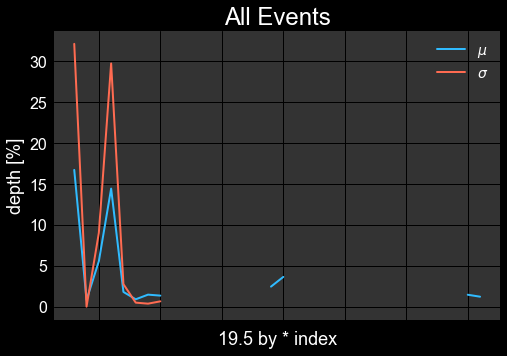

In [17]:
jedi.filter(regex='19.5 by \d+.\d Depth \[%\]').mean().plot()
jedi.filter(regex='19.5 by \d+.\d Depth \[%\]').std().plot()
plt.title('All Events')
plt.xlabel('19.5 by * index')
plt.ylabel('depth [%]')
plt.legend(['$\mu$', '$\sigma$'])